# TASK-1 (Data Science and Business Analytics)
# Prediction using Supervised ML
# By Amrit Gaur intern at The Sparks Foundation


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model


In [39]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

df.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Plotting the graph(no.of hours studied vs marks scored)

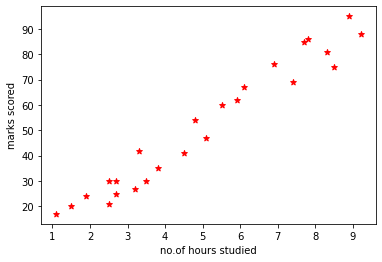

In [40]:
%matplotlib inline
plt.xlabel('no.of hours studied')
plt.ylabel('marks scored')
plt.scatter(df.Hours,df.Scores, color='red',marker='*')

# Preparing the Data

In [41]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [42]:
#Now that we have our attributes and labels, the next step is to split this data into 
#training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [43]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

# **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [44]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


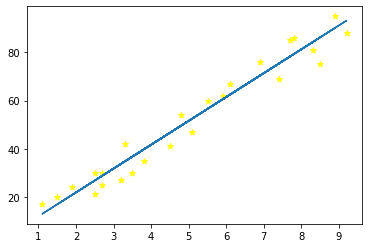

In [45]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y,color='yellow',marker='*')
plt.plot(X, line);
plt.show()

# **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [46]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [47]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [51]:
# You can also test with your own data
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737539


# **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [52]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
